In [29]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import shutil
from fastai import learner

Text(0.5, 1.0, 'Histogram of Classes')

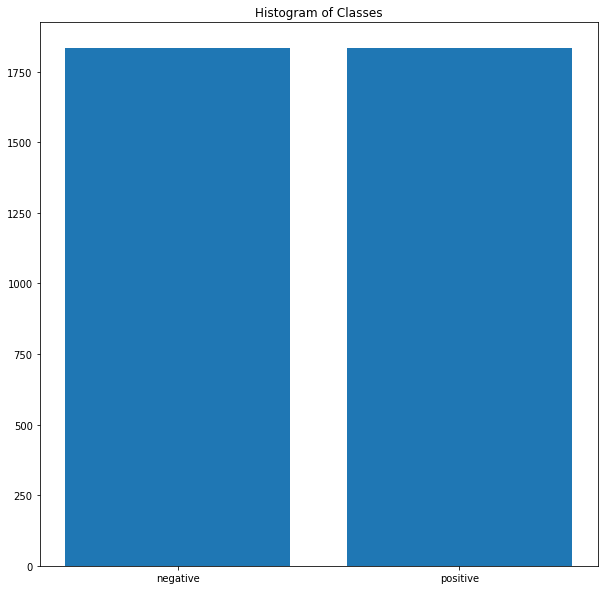

In [4]:
df=pd.read_csv('ArtEmisv1.csv')
df

def modo(x):
    if  x.value_counts()[0]>=sum(x.value_counts())*1.0 :
        return pd.Series.mode(x)
    else:
        return x.value_counts()[:3].index.tolist()

def emtype(x):
    if x.emotion=='sadness':
        return "negative"
    elif x.emotion=='fear':
        return "negative"
    elif x.emotion=='disgust':
        return "negative"
    elif x.emotion=='anger':
        return "negative"
    elif x.emotion=='contentment':
        return "positive"
    elif x.emotion=='awe':
        return "positive"
    elif x.emotion=='amusement':
        return "positive"
    elif x.emotion=='excitement':
        return "positive"
    else:
        return "something else"
    

dfemo=df
dfemo['emotype']= dfemo.apply(emtype,axis=1)

dfemo=dfemo.groupby(["art_style","painting"])["emotype"].agg(modo).reset_index()

t=type(dfemo.emotype[0])
dfemo=dfemo[dfemo["emotype"].apply(lambda x: type(x) !=t )].reset_index()
dfemo = dfemo.drop('index', axis=1)

dfemo=dfemo[dfemo.emotype!="something else"].reset_index()
dfemo = dfemo.drop('index', axis=1)

dfemo['path']= dfemo.apply(lambda x: 'dataset\\wikiart\\'+x['art_style']+"\\"+ x['painting']+".jpg", axis=1)


frac=1-(dfemo.emotype.value_counts()[1]/dfemo.emotype.value_counts()[0])

dfemo = dfemo.drop(dfemo[dfemo['emotype'] == "positive"].sample(frac=frac).index)

plt.figure(figsize=(10,10))
plt.hist(dfemo.emotype,bins=range(0,3), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

In [5]:
#n=dfemo[dfemo['emotype'] == "negative"].sample(n=100,random_state=42)
#n

,art_style,painting,emotype,path
8949,Northern_Renaissance,hans-baldung_dagger-madonna,negative,dataset\wikiart\Northern_Renaissance\hans-bald...
14569,Romanticism,gustave-dore_don-quixote-102,negative,dataset\wikiart\Romanticism\gustave-dore_don-q...
4024,Impressionism,adolf-hitler_the-trail-1916,negative,dataset\wikiart\Impressionism\adolf-hitler_the...
8146,Mannerism_Late_Renaissance,tintoretto_recovery-of-the-corpse-of-st-mark-1566,negative,dataset\wikiart\Mannerism_Late_Renaissance\tin...
16665,Ukiyo_e,tsukioka-yoshitoshi_not_detected_242420,negative,dataset\wikiart\Ukiyo_e\tsukioka-yoshitoshi_no...
...,...,...,...,...
8249,Naive_Art_Primitivism,antonio-ligabue_horses-with-storm,negative,dataset\wikiart\Naive_Art_Primitivism\antonio-...
11478,Realism,boris-kustodiev_akaky-akakiyevich-returned-fro...,negative,dataset\wikiart\Realism\boris-kustodiev_akaky-...
2752,Expressionism,carlos-saenz-de-tejada_the-chapman,negative,dataset\wikiart\Expressionism\carlos-saenz-de-...
9802,Post_Impressionism,corneliu-baba_portrait-of-the-art-collector-za...,negative,dataset\wikiart\Post_Impressionism\corneliu-ba...


In [6]:
#p=dfemo[dfemo['emotype'] == "positive"].sample(n=100,random_state=42)
#p

,art_style,painting,emotype,path
8829,Northern_Renaissance,albrecht-durer_hare-1528,positive,dataset\wikiart\Northern_Renaissance\albrecht-...
13377,Realism,viktor-vasnetsov_prologue-1885,positive,dataset\wikiart\Realism\viktor-vasnetsov_prolo...
6461,Impressionism,joaquã­n-sorolla_the-drinking-jug-1904,positive,dataset\wikiart\Impressionism\joaquã­n-sorolla...
7624,Impressionism,robert-julian-onderdonk_on-long-island-sound-n...,positive,dataset\wikiart\Impressionism\robert-julian-on...
16605,Ukiyo_e,katsushika-hokusai_the-back-of-the-fuji-from-t...,positive,dataset\wikiart\Ukiyo_e\katsushika-hokusai_the...
...,...,...,...,...
7851,Impressionism,willard-metcalf_the-golden-screen,positive,dataset\wikiart\Impressionism\willard-metcalf_...
10587,Post_Impressionism,maxime-maufra_sunset-margat-1900,positive,dataset\wikiart\Post_Impressionism\maxime-mauf...
3517,Expressionism,zinaida-serebriakova_auvergne-town-esteng-1935,positive,dataset\wikiart\Expressionism\zinaida-serebria...
9806,Post_Impressionism,david-burliuk_australia-1954,positive,dataset\wikiart\Post_Impressionism\david-burli...


In [18]:
'''for idx,row in n.iterrows():
    shutil.copy(row[3],"FIDtest\\")'''

In [19]:
'''for idx,row in p.iterrows():
    shutil.copy(row[3],"FIDtest\\")'''

In [39]:
import glob
from PIL import Image

In [35]:
ls=glob.glob("D://Thesis//EmotionalArtGeneration//FIDtest//*")

In [43]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result.resize((256,256))
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result.resize((256,256))

In [44]:
for i in ls:
    ims=Image.open(i)
    r=expand2square(ims,(0,0,0))
    r.save(i)

In [45]:
!python -m pytorch_fid "D://Thesis//EmotionalArtGeneration//FIDtest//" "D://Thesis//EmotionalArtGeneration//FIDresults//" --batch-size 25

FID:  278.3762350948262



100%|##########| 8/8 [00:11<00:00,  1.39s/it]

100%|##########| 8/8 [00:04<00:00,  1.92it/s]


In [49]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import os
from fastai.vision.all import *
from transformers import AutoModelForImageClassification
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from transformers import Swinv2Config, Swinv2ForImageClassification
from transformers import AutoFeatureExtractor, SwinForImageClassification
from PIL import Image

In [51]:
model = SwinForImageClassification.from_pretrained("microsoft/swin-small-patch4-window7-224")


In [52]:
imageDB=DataBlock(blocks=[ImageBlock,CategoryBlock],
                  get_x=ColReader('path'),
                  get_y=ColReader('emotype'),
                  item_tfms=Resize(256,ResizeMethod.Pad, PadMode.Zeros))
dls = imageDB.dataloaders(dfemo,bs=16)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [53]:
opt_func = partial(ranger)
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]
        
learn = Learner(dls, model, loss_func=FocalLossFlat(), cbs=[DropOutput], metrics=error_rate,opt_func=opt_func )

In [54]:
model=learn.load('artemis1_classification_model_swin-small-patch4-window7-224_refined_beforemode_balanced_binary_cross')

C:\Users\Aren\anaconda3\envs\cupy\lib\site-packages\fastai\learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [55]:
import glob


In [70]:
lsn=glob.glob("D://Thesis//EmotionalArtGeneration//imagechosen//negative//*")
lsp=glob.glob("D://Thesis//EmotionalArtGeneration//imagechosen//positive//*")

In [75]:
lsc=glob.glob("D://Thesis//EmotionalArtGeneration//FIDresults//*")

In [71]:
for i in lsn:
    print(model.predict(fastai.vision.core.PILImage(load_image(i)))[0])

positive


positive


positive


positive


positive


negative


negative


negative


positive


negative


In [72]:
for i in lsp:
    print(model.predict(fastai.vision.core.PILImage(load_image(i)))[0])

positive


positive


positive


positive


positive


positive


positive


positive


positive


positive


In [77]:
for i in lsc:
    
    print(i.split("//")[-1],model.predict(fastai.vision.core.PILImage(load_image(i)))[0])

FIDresults\0.png positive


FIDresults\1.png positive


FIDresults\10.png positive


FIDresults\100.png positive


FIDresults\101.png positive


FIDresults\102.png positive


FIDresults\103.png positive


FIDresults\104.png positive


FIDresults\105.png positive


FIDresults\106.png positive


FIDresults\107.png positive


FIDresults\108.png positive


FIDresults\109.png positive


FIDresults\11.png positive


FIDresults\110.png positive


FIDresults\111.png positive


FIDresults\112.png positive


FIDresults\113.png positive


FIDresults\114.png positive


FIDresults\115.png positive


FIDresults\116.png positive


FIDresults\117.png positive


FIDresults\118.png positive


FIDresults\119.png positive


FIDresults\12.png positive


FIDresults\120.png positive


FIDresults\121.png positive


FIDresults\122.png positive


FIDresults\123.png positive


FIDresults\124.png positive


FIDresults\125.png positive


FIDresults\126.png positive


FIDresults\127.png positive


FIDresults\128.png positive


FIDresults\129.png positive


FIDresults\13.png positive


FIDresults\130.png positive


FIDresults\131.png positive


FIDresults\132.png positive


FIDresults\133.png positive


FIDresults\134.png positive


FIDresults\135.png positive


FIDresults\136.png positive


FIDresults\137.png positive


FIDresults\138.png positive


FIDresults\139.png positive


FIDresults\14.png positive


FIDresults\140.png positive


FIDresults\141.png positive


FIDresults\142.png positive


FIDresults\143.png positive


FIDresults\144.png positive


FIDresults\145.png negative


FIDresults\146.png positive


FIDresults\147.png positive


FIDresults\148.png positive


FIDresults\149.png positive


FIDresults\15.png positive


FIDresults\150.png positive


FIDresults\151.png positive


FIDresults\152.png positive


FIDresults\153.png positive


FIDresults\154.png positive


FIDresults\155.png positive


FIDresults\156.png positive


FIDresults\157.png positive


FIDresults\158.png positive


FIDresults\159.png positive


FIDresults\16.png positive


FIDresults\160.png positive


FIDresults\161.png positive


FIDresults\162.png positive


FIDresults\163.png positive


FIDresults\164.png positive


FIDresults\165.png positive


FIDresults\166.png positive


FIDresults\167.png positive


FIDresults\168.png positive


FIDresults\169.png positive


FIDresults\17.png positive


FIDresults\170.png positive


FIDresults\171.png positive


FIDresults\172.png positive


FIDresults\173.png positive


FIDresults\174.png positive


FIDresults\175.png positive


FIDresults\176.png positive


FIDresults\177.png positive


FIDresults\178.png positive


FIDresults\179.png positive


FIDresults\18.png negative


FIDresults\180.png positive


FIDresults\181.png positive


FIDresults\182.png positive


FIDresults\183.png positive


FIDresults\184.png positive


FIDresults\185.png positive


FIDresults\186.png positive


FIDresults\187.png positive


FIDresults\188.png positive


FIDresults\189.png positive


FIDresults\19.png positive


FIDresults\190.png positive


FIDresults\191.png positive


FIDresults\192.png positive


FIDresults\193.png positive


FIDresults\194.png positive


FIDresults\195.png positive


FIDresults\196.png positive


FIDresults\197.png positive


FIDresults\198.png positive


FIDresults\199.png positive


FIDresults\2.png positive


FIDresults\20.png positive


FIDresults\21.png positive


FIDresults\22.png positive


FIDresults\23.png positive


FIDresults\24.png positive


FIDresults\25.png positive


FIDresults\26.png positive


FIDresults\27.png positive


FIDresults\28.png positive


FIDresults\29.png negative


FIDresults\3.png positive


FIDresults\30.png negative


FIDresults\31.png positive


FIDresults\32.png positive


FIDresults\33.png positive


FIDresults\34.png positive


FIDresults\35.png positive


FIDresults\36.png positive


FIDresults\37.png positive


FIDresults\38.png positive


FIDresults\39.png positive


FIDresults\4.png positive


FIDresults\40.png positive


FIDresults\41.png positive


FIDresults\42.png positive


FIDresults\43.png positive


FIDresults\44.png positive


FIDresults\45.png positive


FIDresults\46.png positive


FIDresults\47.png positive


FIDresults\48.png positive


FIDresults\49.png positive


FIDresults\5.png positive


FIDresults\50.png positive


FIDresults\51.png positive


FIDresults\52.png positive


FIDresults\53.png positive


FIDresults\54.png positive


FIDresults\55.png positive


FIDresults\56.png positive


FIDresults\57.png negative


FIDresults\58.png positive


FIDresults\59.png positive


FIDresults\6.png positive


FIDresults\60.png positive


FIDresults\61.png positive


FIDresults\62.png positive


FIDresults\63.png positive


FIDresults\64.png positive


FIDresults\65.png positive


FIDresults\66.png positive


FIDresults\67.png positive


FIDresults\68.png negative


FIDresults\69.png positive


FIDresults\7.png positive


FIDresults\70.png positive


FIDresults\71.png positive


FIDresults\72.png positive


FIDresults\73.png positive


FIDresults\74.png positive


FIDresults\75.png positive


FIDresults\76.png negative


FIDresults\77.png positive


FIDresults\78.png positive


FIDresults\79.png positive


FIDresults\8.png positive


FIDresults\80.png positive


FIDresults\81.png negative


FIDresults\82.png positive


FIDresults\83.png positive


FIDresults\84.png positive


FIDresults\85.png positive


FIDresults\86.png positive


FIDresults\87.png positive


FIDresults\88.png positive


FIDresults\89.png positive


FIDresults\9.png positive


FIDresults\90.png positive


FIDresults\91.png positive


FIDresults\92.png positive


FIDresults\93.png positive


FIDresults\94.png positive


FIDresults\95.png positive


FIDresults\96.png negative


FIDresults\97.png positive


FIDresults\98.png positive


FIDresults\99.png positive
